## Methodology: Ordinary Least Squares (OLS)
In this stage, we implement the Ordinary Least Squares (OLS) regression to establish our performance baseline:

OLS Regression: Used as the primary linear model to find the best-fitting relationship between features and the target variable.

Error Diagnosis: We focus on OLS residual analysis to check if the data follows linear assumptions, which helps in deciding the next steps for model improvement.

In [ ]:
# --- Pre-processing for Linear Models ---
# Linear models cannot handle strings. We must convert categorical strings into numeric values.
# We use get_dummies to transform categorical columns into a numeric format (One-Hot Encoding).
X_train_numeric = pd.get_dummies(X_train, drop_first=True)
X_test_numeric = pd.get_dummies(X_test, drop_first=True)

# Ensure both train and test have the same columns after encoding
X_train_numeric, X_test_numeric = X_train_numeric.align(X_test_numeric, join='left', axis=1, fill_value=0)

# We only keep features that are numbers (float or int)
# 'eval_set', 'user_id', and 'product_id' must be removed
X_train_numeric = X_train.select_dtypes(include=[np.number])
X_test_numeric = X_test.select_dtypes(include=[np.number])

--- OLS Regression Performance ---
MAE: 7.7423
MSE: 88.4436
RMSE: 9.4044
R2 Score: 0.0792
Adjusted R2: 0.0792

--- Statistical Tests ---
Breusch-Pagan p-value: 0.0000


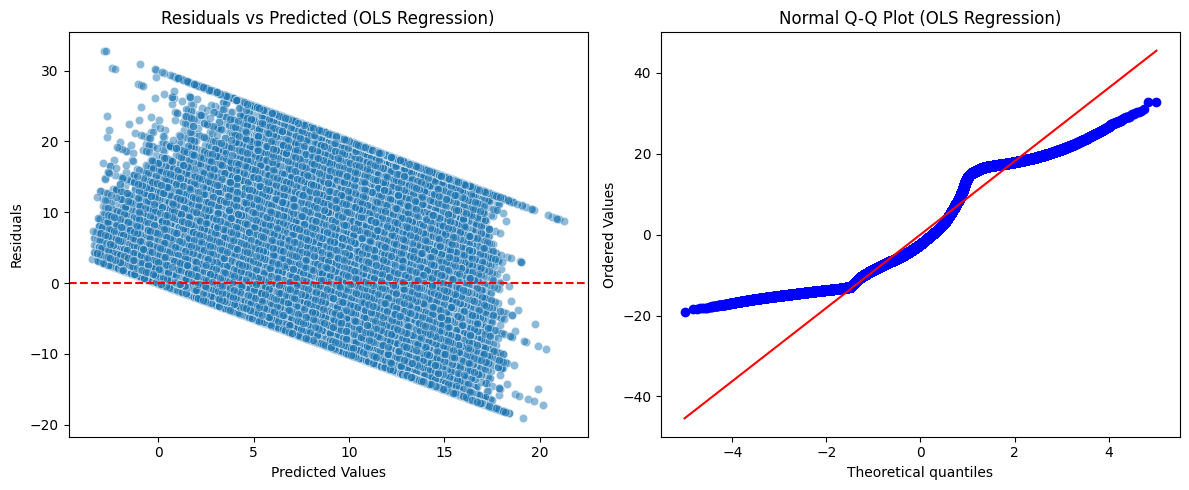

In [ ]:
# --- 1. Ordinary Least Squares (OLS) ---
# Establishing a performance benchmark with basic linear regression.
ols_reg = LinearRegression()
ols_reg.fit(X_train_numeric, y_train)
ols_pred = ols_reg.predict(X_test_numeric)
evaluate_regression("OLS Regression", y_test, ols_pred, X_test_numeric)